# Machine Learning Model Development

## 3 - Model Training

For model training, we will be selecting three models and train them first to observe their performance. After that we can tune the hyperparameters to get the best performance from each model and see which model gives the greatest performance of the three.

The models chosen for this task are:
###### 1- Logistic Regression.
###### 2- Support Vector Machine.
###### 3- K-Nearest Neighbors.

### Logistic Regression

In logistic regression, the model decides the outcome as a binary output i.e. whether it is a specific bird or not. In our case we have six classes. So we will be using a multiclass logistic regression classifier which is sometimes also called as a ‘one vs. rest’ classifier. In this type of model, one of the classes is compared to rest of the class creating multiple models for each class, which predicts the probability of that class. The model with highest probability of a class is decided and its prediction is taken as the class prediction. To use one ovs. rest feature, we use a hyperparameter multi_class = 'ovr' as shown below.

In [48]:
from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression(max_iter=1000,multi_class='ovr',random_state=4)

In [49]:
model_logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=4)

#### Evaluation

To Evaluate our model we will use Confusion matrix and using the values in the confusin matrix we will calculate some important metrics that will help us understand the performance of the model.

As the specificity is not available in the metrics from SKlearn we have to create our own function to calculate it. The formula to calculate the specificity is;

&emsp;
    $$Specificity =  \displaystyle \Bigg[\frac{ True Negative}{True Neagative + False Positive}\Bigg]$$

Along with specificity we can also caculate the loss too using the following formula;

&emsp;
    $$Loss =  \displaystyle \Bigg[\frac{ False Positive + False Negative}{Total  Number  Of  Predictions}\Bigg]$$


In [50]:
def specificity (conf_matrix):
    Spec_per_class=[]
    loss=0
    Los=[]
    Specificity=0
    dia=np.sum(np.diag(conf_matrix))
    for i in range(6):
        TP = conf_matrix[i][i]         # True Possitives
        sum=0
        for j in range(6):
            sum=sum+conf_matrix[j][i]   
        FP = sum-TP                    # False Possitives
        TN = dia-TP                    # True Negatives
        FN = np.sum(conf_matrix[i])-TP # False Negatives
        spec=TN/(TN+FP)                # Specificity
        Specificity=spec+Specificity
        Spec_per_class.append(spec)
        loss=(FP+FN)/(FP+FN+TP+TN)     # Also calculated loss
        Los.append(loss)    
    Loss=np.sum(Los)/6
    Avg_Specificity = Specificity/6    # Taking average value
    classes=['P','R','SO','SW','T','W']
    Spec_per_class=pd.DataFrame(data=Spec_per_class,index=classes,columns=['Specificity'])
    
    
    return(Avg_Specificity,Spec_per_class,Loss)

###### Confusuion matrix

The confusion matrix shows a comparison of expected/real target values to the predicted target values. In this case, we are going to represent the confusion mtrix, both in the form of number of predictions and percentages to make it moreunderstandable.

<AxesSubplot:>

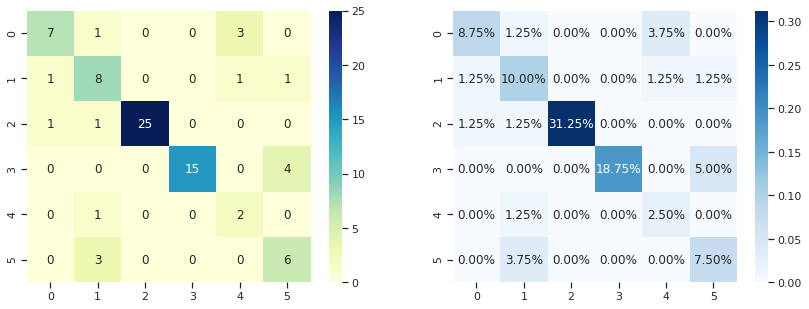

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

cf_matrix=confusion_matrix(y_test,model_logistic.predict(X_test))

sns.heatmap(cf_matrix, annot=True,cmap='YlGnBu',ax=axes[0])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues',ax=axes[1])

The matrix on the left shows that 7 of the Scansorial birds are predicted correctly from the test set while at one instance it is predicted as Raptor bird, and three times as a Terrestrial bird (False Negative). Also at three separate instances, other birds are wrongly predicted as Scansorial (False Positive). Similarly other predictions can also be observed from this confusion matrix. 

On the right matrix, these values are represented in the form of percentage of the data from test set. 

###### Classification Report

To view the metrics like precision, recall and F1 score are very important to understand the actual performance in addition to the accuracy. 
* Precision is the measure of True Positives among the total positive predictions.
* Recall is the measure of True Positives among the actual possitive entries (either predicted positive or not)
* F-1 Score is the harmonic mean of the Precision-Recall values.
* Accuracy is ratio of all the True preditions to the total number of predictions.
* Specificity is the measure of the True Negatives among the actual Negative entries (either predicted positive or not)

In [52]:
print(classification_report(y_test,model_logistic.predict(X_test),target_names=label.classes_))

              precision    recall  f1-score   support

           P       0.78      0.64      0.70        11
           R       0.57      0.73      0.64        11
          SO       1.00      0.93      0.96        27
          SW       1.00      0.79      0.88        19
           T       0.33      0.67      0.44         3
           W       0.55      0.67      0.60         9

    accuracy                           0.79        80
   macro avg       0.70      0.74      0.70        80
weighted avg       0.83      0.79      0.80        80



In [53]:
Avg_specificity,Spec_per_class,Loss=specificity(cf_matrix)
print('Average Specificity = %.2f'% Avg_specificity)
print('Loss = %.3f'% Loss)
print('\nClass',((Spec_per_class*100).astype(int))/100)

Average Specificity = 0.95
Loss = 0.081

Class     Specificity
P          0.96
R          0.90
SO         1.00
SW         1.00
T          0.93
W          0.91


The classification report for the logistic Regression model shows that the model has 81% accuracy.
The precision values are not that bad, and our main concern here is also not the precision, but the Recall. As we know, Recall tells us the number of true positive predictions out of all the posstive predictions in the set. Thus a higher value of recall will mean higher value of True positives and lower value of False negatives. In this task our main goal is to have True Positive rate as high as possible. The high precision means high True positive rate as compared to all positive predictions which also include false positives. But our main goal does not concern false negatives. We will also consider f-score as a metric as it is the harmonic mean of Precion and recall. 
From confusion matrix, we know 7/11 scansorial birds are correctly classified giving us a recall of 0.64. Similarly, All terestrial birds are predicted correclty so we have a recall of 1. We see that the Avg. F1 Score of this model is 0.74, which is the average of harmonic mean of precion and recall.

In a similar fashion, we can observe the performance of the other classes as well. The specificity of each classs is also given and the average comes out to be 96%.

### Support Vector Machine

In SVM, the main goal is to create a hyper-plane that separates the two classes such that the distance between the hyper-plane and the closest training data point is maximum.Basically SVM is a binary classification problem, but
there are some methods used to solve multiple class problems using SVM. The standard way to do this is divide the data points into dichotomies. Oneof the methods involves dividing the classes such that one class is compared with all the remaining data points which is basically the concept of ‘one vs. rest’ method as explained in the logistic regression model. We will use the support vector classifier (SVC) from Scikit learn SVM module.

In [54]:
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(X_train,y_train)

SVC()

#### Evaluation

<AxesSubplot:>

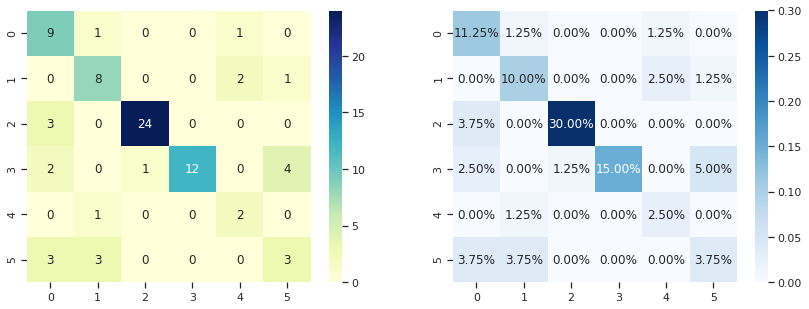

In [55]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

cf_matrix=confusion_matrix(y_test,model_svm.predict(X_test))

sns.heatmap(cf_matrix, annot=True,cmap='YlGnBu',ax=axes[0])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues',ax=axes[1])

In [56]:
print(classification_report(y_test,model_svm.predict(X_test),target_names=label.classes_))

              precision    recall  f1-score   support

           P       0.53      0.82      0.64        11
           R       0.62      0.73      0.67        11
          SO       0.96      0.89      0.92        27
          SW       1.00      0.63      0.77        19
           T       0.40      0.67      0.50         3
           W       0.38      0.33      0.35         9

    accuracy                           0.73        80
   macro avg       0.65      0.68      0.64        80
weighted avg       0.78      0.72      0.73        80



In [57]:
Avg_specificity,Spec_per_class,Loss=specificity(cf_matrix)
print('Average Specificity = %.2f'% Avg_specificity)
print('Loss = %.3f'% Loss)
print('\nClass',((Spec_per_class*100).astype(int))/100)

Average Specificity = 0.93
Loss = 0.111

Class     Specificity
P          0.85
R          0.90
SO         0.97
SW         1.00
T          0.94
W          0.91


As explained in the previous section, 60% of Scansorial birds were precise and recall was found to be 82%. This means 9 out of 11 scansorial birds are correctly classified and the remaining two were wrong predictions. These false predictions come out as raptor and a terstrial bird from the confusion matrix. The average recall is 69% and which is not a good value and will be inceased when we do hyperparameter tuning. F1 Score shows no different result than the precion and recall, standing at a low value of 65%. The accuracy of the model is observed to be 74%. The above classification report can be reffered to see the precision and recall of other bird types.

### K-Nearest Neighbors

In KNN, the distance of the test data point is measured from K number of training points of different classes and the class with greatest number of close points is taken as the predicted class. The distance could be Euclidian distance or Manhattan distance.

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Evaluation

<AxesSubplot:>

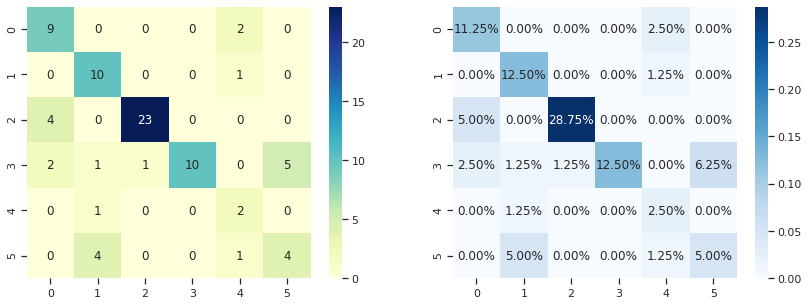

In [59]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

cf_matrix = confusion_matrix(y_test,knn.predict(X_test))

sns.heatmap(cf_matrix, annot=True,cmap='YlGnBu',ax=axes[0])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues',ax=axes[1])


In [60]:
print(classification_report(y_test,knn.predict(X_test),target_names=label.classes_))

              precision    recall  f1-score   support

           P       0.60      0.82      0.69        11
           R       0.62      0.91      0.74        11
          SO       0.96      0.85      0.90        27
          SW       1.00      0.53      0.69        19
           T       0.33      0.67      0.44         3
           W       0.44      0.44      0.44         9

    accuracy                           0.73        80
   macro avg       0.66      0.70      0.65        80
weighted avg       0.79      0.72      0.73        80



In [61]:
Avg_specificity,Spec_per_class,Loss=specificity(cf_matrix)
print('Average Specificity = %.2f'% Avg_specificity)
print('Loss = %.3f'% Loss)
print('\nClass',((Spec_per_class*100).astype(int))/100)

Average Specificity = 0.93
Loss = 0.112

Class     Specificity
P          0.89
R          0.88
SO         0.97
SW         1.00
T          0.93
W          0.91


The KNN model shows 71% avg precision and 75% average recall with an accuracy of 78%. The average specificity of this model is 95% and the F1 score is at 70%.